# Introducción a la Programación en MATLAB (C5)

Mauricio Tejada

ILADES - Universidad Alberto Hurtado

Agosto 2017

## Contenidos

- [Importando y Exportando Datos](#5.-Importando-y-Exportando-Datos)

## 5. Importando y Exportando Datos

Mientras trabajamos en Matlab, todo el espacio de trabajo se encuentra guardado en la memoria RAM del computador, por lo que al cerrar el programa toda esa memoria es liberada y la información eliminada.

Matlab puede guardar el espacio de trabajo u objetos particulares en diversos formatos. 

El formato nativo de Matlab es `.mat`. 

- `save nombre_archivo` guarda todos los objetos del espacio de trabajo en el archivo `nombre_archivo.mat`.
- `save nombre_archivo A B C ...` guarda los objetos `A`, `B` y `C` (...) del espacio de trabajo en el archivo `nombre_archivo.mat`.

Nota: Todos los archivos serán guardados en el directorio de trabajo.

- `load nombre_archivo` carga todos los objetos guardados en el archivo `nombre_archivo.mat` en el espacio de trabajo.

In [1]:
clear all;
A = rand(2,2);
B = rand(5,5);

save matrices;
save matA A;

In [2]:
clear all;
load matrices;

whos;

Name      Size            Bytes  Class     Attributes

  A         2x2                32  double              
  B         5x5               200  double


In [3]:
clear all;
load matA;

whos;

Name      Size            Bytes  Class     Attributes

  A         2x2                32  double


Existen situaciones en que es útil guardar la información en archivos de texto (`txt`).

- `save nombre_archivo.txt A -ascii` guarda el objeto `A` en el archivo `nombre_archivo.txt`.
- `load nombre_archivo.txt` carga el objeto guardado en el archivo `nombre_archivo.txt` en el espacio de trabajo.

Alternativamente se puede usar también:

- `dlmwrite('nombre_archivo.txt',variable)` guarda el objeto `variable`.
- `variable = importdata('nombre_archivo.txt')` carga el objeto y lo guarda en el espacio de trabajo como `variable`.

A modelo de ejemplo vamos a crear una matriz de tamaño $100 \times 5$ con números aleatorios extraídos de una distribución normal con media 100 y varianza 25) y los guardaremos en formato txt.

In [4]:
datos = 100 + 5*randn(100,5);
save datos.txt datos -ascii;

Matlab también es capaz de guardar y leer datos desde Excel.

- `xlswrite('nombre_archivo.xls',variable)` guarda el objeto `variable` en el archivo `nombre_archivo.xls`.
- `variable = xlsread('nombre_archivo.xls')` carga el objeto y lo guarda en el espacio de trabajo como `variable`.

Al importartar datos de Excel es también posible definir la hoja y el rango específicos de los cuales los datos serán importados.

- `data = xlsread('nombre_archivo.xls','sheet','range')` con `sheet` el nombre de de la hoja de cálculo y `range` el rango de datos (ejemplo A1:C4). 

Por ejemplo, importemos información sobre el PIB de Chile.

In [5]:
datos = xlsread('PIBChile.xlsx','Datos','A2:B57');

tiempo = datos(:,1);
pib = datos(:,2);

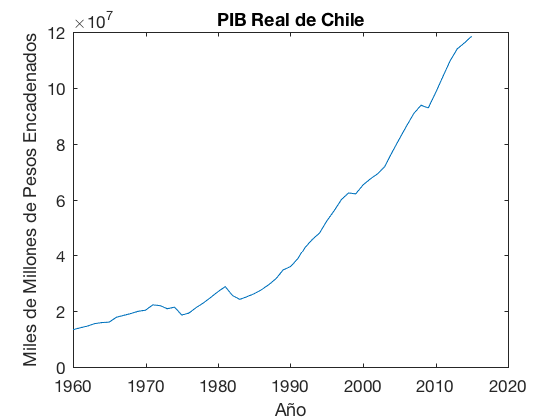

In [6]:
plot(tiempo,pib);
title('PIB Real de Chile');
ylabel('Miles de Millones de Pesos Encadenados');
xlabel('Año');
set(gca,'FontSize',8);

Ahora computemos la tasa de crecimiento:

In [7]:
T = length(pib);
g = ((pib(2:T,1) - pib(1:T-1,1))./pib(1:T-1,1))*100;

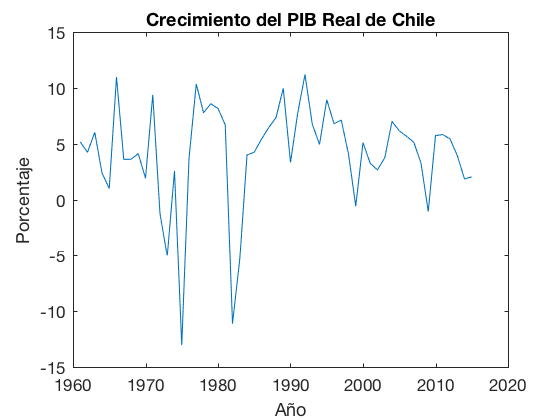

In [8]:
plot(tiempo(2:T),g);
title('Crecimiento del PIB Real de Chile');
ylabel('Porcentaje');
xlabel('Año');
set(gca,'FontSize',8);

In [9]:
crecprom = mean(g)

crecprom =

    4.1616
